# Chapter 4 - Markov Chains and Networks (Python Code)

We begin with some imports.

In [1]:
import quantecon as qe
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


## Markov Chains as Digraphs

- Figure 4.3: Contour plot of transition matrix $P_B$

In [2]:
codes =  ( '1','2','3','4','5','6','7','8')

P_B = [[0.222, 0.222, 0.215, 0.187, 0.081, 0.038, 0.029, 0.006],
       [0.221, 0.22, 0.215, 0.188, 0.082, 0.039, 0.029, 0.006],
       [0.207, 0.209, 0.21, 0.194, 0.09, 0.046, 0.036, 0.008],
       [0.198, 0.201, 0.207, 0.198, 0.095, 0.052, 0.04, 0.009],
       [0.175, 0.178, 0.197, 0.207, 0.11, 0.067, 0.054, 0.012],
       [0.182, 0.184, 0.2, 0.205, 0.106, 0.062, 0.05, 0.011],
       [0.123, 0.125, 0.166, 0.216, 0.141, 0.114, 0.094, 0.021],
       [0.084, 0.084, 0.142, 0.228, 0.17, 0.143, 0.121, 0.028]]

P_B = np.array(P_B)


In [3]:
def plot_matrices(matrix,
                  codes,
                  ax,
                  font_size=12,
                  alpha=0.6, 
                  colormap=cm.viridis, 
                  color45d=None, 
                  xlabel='sector $j$', 
                  ylabel='sector $i$'):
    
    ticks = range(len(matrix))

    levels = np.sqrt(np.linspace(0, 0.75, 100))
    
    
    if color45d != None:
        co = ax.contourf(ticks, 
                         ticks,
                         matrix,
#                          levels,
                         alpha=alpha, cmap=colormap)
        ax.plot(ticks, ticks, color=color45d)
    else:
        co = ax.contourf(ticks, 
                         ticks,
                         matrix,
                         levels,
                         alpha=alpha, cmap=colormap)

    #plt.colorbar(co)

    ax.set_xlabel(xlabel, fontsize=font_size)
    ax.set_ylabel(ylabel, fontsize=font_size)
    ax.set_yticks(ticks)
    ax.set_yticklabels(codes)
    ax.set_xticks(ticks)
    ax.set_xticklabels(codes)


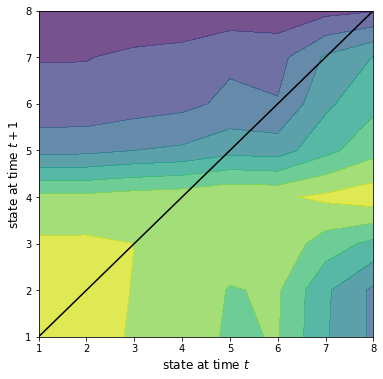

In [4]:
fig, ax = plt.subplots(figsize=(6,6))
plot_matrices(P_B.transpose(), codes, ax, alpha=0.75, 
                 colormap=cm.viridis, color45d='black',
                 xlabel='state at time $t$', ylabel='state at time $t+1$')

plt.show()


- Figure 4.4: Wealth percentile over time

**no code in figures_cource**


- Figure 4.5: Predicted vs realized cross-country income distributions for 2019

In [5]:
def divide_two_cols(df_sub):
    df_sub['gdppc_r'] = df_sub['gdppc'] / df_sub['gdppc_w']
    return df_sub

In [6]:
def gdp_dist_estimate(yr=(1960, 2019)):
    Y = np.zeros(len(l))
    for i in l:
        Y[i] = df3[(df3['interval'] == i) & (df3['year'] <= yr[1]) & (df3['year'] >= yr[0])].count()[0]
    
    return Y / Y.sum()


In [7]:
from pandas_datareader import wb

data = wb.get_countries()
data = data[data['region'] != 'Aggregates']
countries = list(data['iso2c'])

# NY.GDP.PCAP.CD GDP per capita in current US$ and NY.GDP.PCAP.PP.CD GDP per capita in current international $
ind = ['NY.GDP.PCAP.CD'] 
dat = wb.download(indicator=ind, country=countries, start=1960, end=2019)
dat = dat.reset_index()
dat.columns = 'country', 'year', 'gdppc'

dat0 = wb.download(indicator=ind, country='WLD', start=1960, end=2019)
dat0 = dat0.reset_index()
dat0.columns = 'country', 'year', 'gdppc_w'
dat0 = dat0[['year', 'gdppc_w']]

df1 = pd.merge(dat, dat0, on='year').set_index(['country','year'])
df2 = df1.groupby('country').apply(divide_two_cols)

q = [0, 0.25, 0.5, 1.0, 2.0, np.inf]
l = [0, 1, 2, 3, 4]

x = pd.cut(df2.gdppc_r, bins=q, labels=l)
df2['interval'] = x
df2['interval'] = df2['interval'].astype(float)

df3 = df2
df3['diff'] = df3.groupby('country')['interval'].diff(1)
df3 = df3.reset_index()
df3['year'] = df3['year'].astype(float)


/usr/share/miniconda3/envs/networks/lib/python3.8/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: JG, XK
  warnings.warn(


/usr/share/miniconda3/envs/networks/lib/python3.8/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: WLD
  warnings.warn(


In [8]:
ψ_1985 = gdp_dist_estimate(yr=(1985, 1985))
ψ_2019 = gdp_dist_estimate(yr=(2019, 2019))


In [9]:
P_Q = [[0.97, 0.03, 0.00, 0.00, 0.00],
       [0.05, 0.92, 0.03, 0.00, 0.00],
       [0.00, 0.04, 0.92, 0.04, 0.00],
       [0.00, 0.00, 0.04, 0.94, 0.02],
       [0.00, 0.00, 0.00, 0.01, 0.99]]
P_Q = np.array(P_Q)
ψ_2019_predicted = ψ_1985 @ np.linalg.matrix_power(P_Q, 2019-1985)


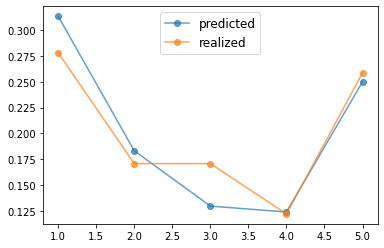

In [10]:
states = np.arange(1, 6)

fig, ax = plt.subplots()
width = 0.4
ax.plot(states, ψ_2019_predicted, '-o', alpha=0.7, label='predicted')
ax.plot(states, ψ_2019, '-o', alpha=0.7, label='realized')

ax.legend(loc='upper center', fontsize=12)
plt.show()


**Plot slightly different to that in text**

In [11]:
def unit_simplex(angle):
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    vtx = [[0, 0, 1],
           [0, 1, 0], 
           [1, 0, 0]]
    
    tri = Poly3DCollection([vtx], color='darkblue', alpha=0.3)
    tri.set_facecolor([0.5, 0.5, 1])
    ax.add_collection3d(tri)

    ax.set(xlim=(0, 1), ylim=(0, 1), zlim=(0, 1), 
           xticks=(1,), yticks=(1,), zticks=(1,))

    ax.set_xticklabels(['$(1, 0, 0)$'], fontsize=16)
    ax.set_yticklabels([f'$(0, 1, 0)$'], fontsize=16)
    ax.set_zticklabels([f'$(0, 0, 1)$'], fontsize=16)

    ax.xaxis.majorTicks[0].set_pad(15)
    ax.yaxis.majorTicks[0].set_pad(15)
    ax.zaxis.majorTicks[0].set_pad(35)

    ax.view_init(30, angle)

    # Move axis to origin
    ax.xaxis._axinfo['juggled'] = (0, 0, 0)
    ax.yaxis._axinfo['juggled'] = (1, 1, 1)
    ax.zaxis._axinfo['juggled'] = (2, 2, 0)
    
    ax.grid(False)
    
    return ax


In [12]:
def convergence_plot(ψ, n=14, angle=50):

    ax = unit_simplex(angle)

    # Convergence plot

    P = ((0.9, 0.1, 0.0),
         (0.4, 0.4, 0.2),
         (0.1, 0.1, 0.8))
    
    P = np.array(P)

    ψ = ψ        # Initial condition

    x_vals, y_vals, z_vals = [], [], []
    for t in range(n):
        x_vals.append(ψ[0])
        y_vals.append(ψ[1])
        z_vals.append(ψ[2])
        ψ = ψ @ P

    ax.scatter(x_vals, y_vals, z_vals, c='darkred', s=80, alpha=0.7, depthshade=False)

    mc = qe.MarkovChain(P)
    ψ_star = mc.stationary_distributions[0]
    ax.scatter(ψ_star[0], ψ_star[1], ψ_star[2], c='k', s=80)

    return ψ


- Figure 4.6: A trajectory from $\psi_0 = (0, 0, 1)$

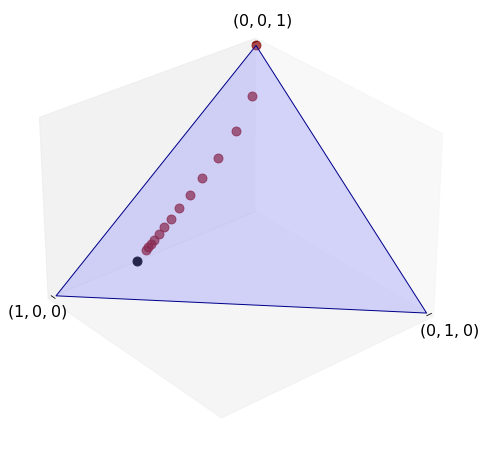

In [13]:
ψ = convergence_plot((0, 0, 1))
plt.show()


- Figure 4.7: A trajectory from $\psi_0 = (0, 1/2, 1/2)$

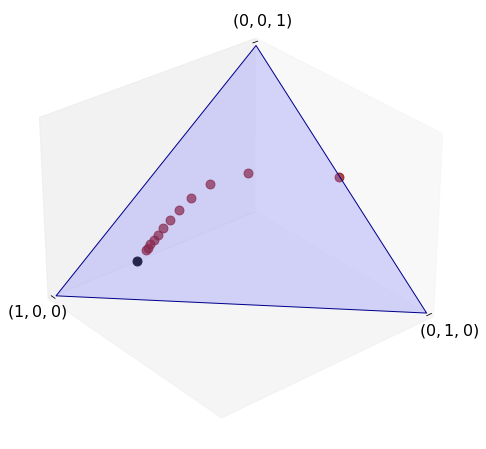

In [14]:
ψ = convergence_plot((0, 0.5, 0.5), n=12)
plt.show()


**Background lines missing**

- Figure 4.8: Distribution projections from $P_B$

**code not in figures_source**

## Asymptotics

- Figure 4.10: Convergence of the empirical distribution to $\psi^*$